## 1. Fragestellung(en) und Datenbeschaffung
Gruppe: Phi Phi Cung und Lou-Salomé Frehner
### 1.1 Titel: 
- Sterblichkeitsrate von Atemwegsinfektionen pro 100'000 Personen von 2000 bis 2020
### 1.2 Fragestellung:
- Welche 5 Länder hatten von 2000 bis 2020 die grösste Zunahme bzw. Abnahme der Sterblichkeitsrate durch Atemwegsinfektionen?
- Was sind mögliche Gründe dafür?
### 1.3 Datenquelle(n):
https://ourworldindata.org/grapher/respiratory-infection-death-rate-who-mdb




### 1.4 Daten beschaffen und laden

In [310]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [311]:
# lade hier deine Daten
df = pd.read_csv('respiratory-infection-death-rate-who-mdb.csv', skiprows=1, 
                 names=['Länder','Code','Jahr','Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen'])
df.head()


,Länder,Code,Jahr,Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen
0,Albania,ALB,1987,69.32097
1,Albania,ALB,1988,59.96708
2,Albania,ALB,1989,75.36185
3,Albania,ALB,1992,64.09694
4,Albania,ALB,1993,69.78366


## 2. Daten vorbereiten 
Der Datensatz hat das Long-Format:

Jede Zeile repräsentiert eine Beobachtung, bestehend aus den folgenden Spalten:
- Länder: Der Name des Landes (z. B. Kanada, Australien).
- Code: Der standardisierte Ländercode (z. B. CAN, AUS).
- Jahr: Das Jahr der Beobachtung (z. B. 2000, 2020).
- Todesfälle durch Atemwegsinfektionen: Die altersstandardisierte Sterblichkeitsrate pro 100000 Personen.
- Im Long-Format sind die Werte für die Sterblichkeitsrate in einer Spalte organisiert, während die übrigen Spalten Kategorien oder Indizes darstellen.

Die Datentypen im Datensatz sind:

- Länder: object (String; textbasiert, z. B. "Kanada").
- Code: object (String; textbasiert, z. B. "CAN").
- Jahr: int64 (Ganzzahl; numerisch, z. B. 2000, 2020).
- Sterblichkeitsrate: float64 (Dezimalzahl; kontinuierlich, z. B. 69.32).

In [312]:
df_pivot = df.pivot(index='Länder', columns='Jahr', values='Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen')
df_pivot.head()

Jahr,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Länder,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.206214,19.790750,32.962810,17.233988,12.686172,26.913685,17.549429,25.599234,103.138080,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.840980,41.425716,46.261000,55.549500,52.927692,49.750935,50.036976,129.054060,196.347100,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.797947,14.825234,18.150202,21.427942,22.369265,33.270714,32.871216,136.314000,178.072220,59.339447
Australia,44.541817,46.18928,40.555084,36.833664,40.231956,35.56524,39.746117,42.80438,34.36434,47.42999,...,5.370212,6.066640,6.208516,6.525617,8.127273,5.351823,7.287782,5.021166,5.508817,19.580791


## 3. Statistik der Rohdaten (Analyse im Long-Format)
Über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Jahr* enthält 117 verschiede Länder.
- ⁠Länder wie Kanada, Niederlande, Japan, Australien und Schweden haben jeweils über 72 Einträge. 
- Die Spalte *Codes* enthält 117 verschiedene Codes.
- Es sind Daten zwischen 1950 and 2022 vorhanden.
- Das Jahr mit den meisten Datenpunkten ist 2010 (96 Einträge). 
- In bestimmten Jahren sind für einige Länder keine Daten vorhanden.
- Die Sterblichkeitsrate durch Atemwegsinfektionen streuen zwischen 1.05 und 377.28 pro 100000 Personen.
- Die Variable "Sterblichkeitsrate durch Atemwegsinfektionen" ist kontinuierlich, da sie numerische Werte mit Dezimalstellen enthält. 
- ⁠Das Histogramm zeigt, dass die meisten Todesfälle pro 100000 Personen im Bereich unter 50 liegen, mit einigen Ausreissern über 300.




In [313]:
df_long = pd.read_csv('respiratory-infection-death-rate-who-mdb.csv')

In [314]:
df_long

,Länder,Code,Jahr,Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen
0,Albania,ALB,1987,69.320970
1,Albania,ALB,1988,59.967080
2,Albania,ALB,1989,75.361850
3,Albania,ALB,1992,64.096940
4,Albania,ALB,1993,69.783660
...,...,...,...,...
4636,Venezuela,VEN,2012,21.126587
4637,Venezuela,VEN,2013,23.221132
4638,Venezuela,VEN,2014,25.174698
4639,Venezuela,VEN,2015,27.281538


### 3.1 Analyse Länder

In [315]:
print('Anzahl verschiedener Länder: ', len(df['Länder'].unique()))

Anzahl verschiedener Länder:  117


In [316]:
# Anzahl Datenpunkte pro Land
df['Länder'].value_counts()

Länder
Canada                   73
Netherlands              73
Japan                    72
Australia                72
Sweden                   72
                         ..
Sao Tome and Principe     3
Lebanon                   3
Cape Verde                2
Saudi Arabia              2
Syria                     1
Name: count, Length: 117, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Land'}, xlabel='Länder', ylabel='Anzahl Datenpunkte'>

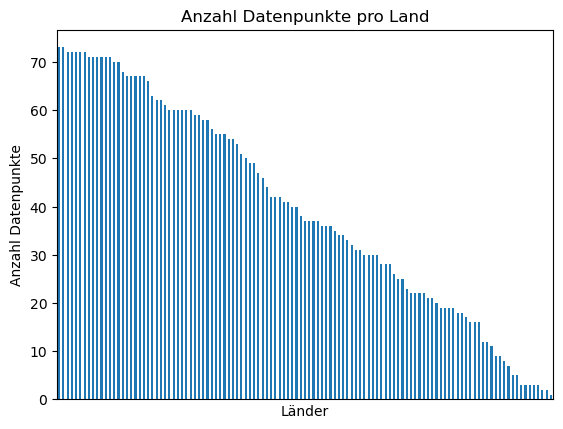

In [317]:
df['Länder'].value_counts().plot(
    kind='bar',
    xticks=[],  # Entfernt die einzelnen Länder von der x-Achse
    xlabel='Länder',  # Setzt "Länder" als allgemeine Beschriftung für die x-Achse
    ylabel='Anzahl Datenpunkte',  # Beschriftung der y-Achse
    title='Anzahl Datenpunkte pro Land'  # Titel der Grafik
)

### 3.2 Analyse Codes

In [318]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  117


In [319]:
# Anzahl Datenpunkte pro Land
df['Code'].value_counts()

Code
CAN    73
NLD    73
JPN    72
AUS    72
SWE    72
       ..
STP     3
LBN     3
CPV     2
SAU     2
SYR     1
Name: count, Length: 117, dtype: int64

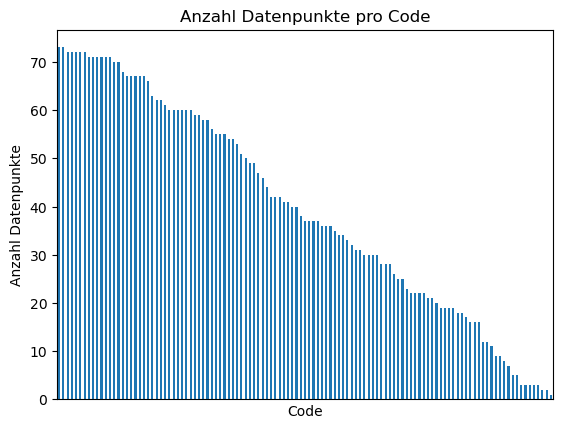

In [320]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [321]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  73


In [322]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()

Jahr
1950     9
1951    17
1952    18
1953    19
1954    20
        ..
2018    82
2019    80
2020    65
2021    51
2022    15
Name: count, Length: 73, dtype: int64

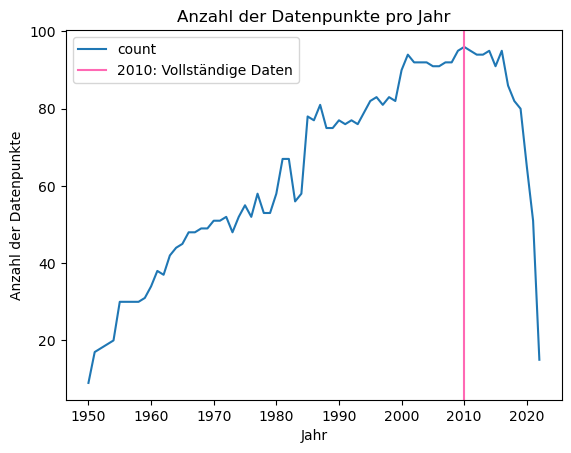

In [323]:
g = df['Jahr'].value_counts().sort_index().plot(
    ylabel='Anzahl der Datenpunkte',
    xlabel='Jahr',
    title='Anzahl der Datenpunkte pro Jahr'
)

# Vertikale Linie bei 2010 hinzufügen
g.axvline(x=2010, color='hotpink', label='2010: Vollständige Daten')

# Legende anzeigen
g.legend()

### 3.4 Analyse

In [324]:
df.describe()

,Jahr,Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen
count,4641.000000,4641.000000
mean,1992.667313,34.196449
std,18.426826,32.514145
min,1950.000000,1.054690
25%,1979.000000,14.062974
50%,1995.000000,24.384080
75%,2008.000000,43.247025
max,2022.000000,377.275300


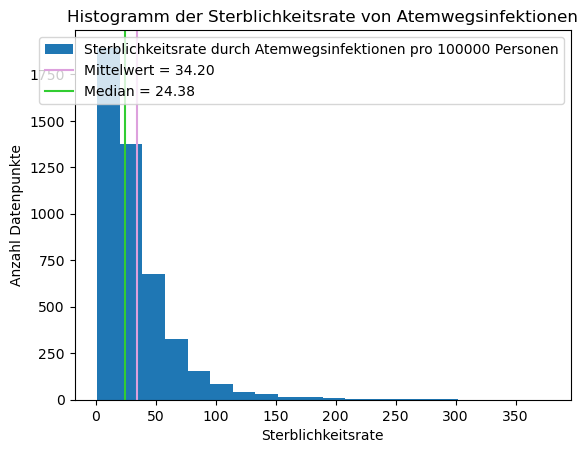

In [325]:
g = df['Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen'].plot(kind='hist', bins=20, title='Histogramm der Sterblichkeitsrate von Atemwegsinfektionen', 
                           xlabel='Sterblichkeitsrate', ylabel='Anzahl Datenpunkte')
mean = df['Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen'].mean()
g.axvline(x=df['Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen'].mean(), color='plum',label=f'Mittelwert = {mean:.2f}')  # pinke Linie bei Mittelwert

median = df['Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen'].median()
g.axvline(x=df['Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen'].median(), color='limegreen',label=  f'Median = {median:.2f}')  # grüne Linie bei Median

g.legend()


## 4. Analyse 
### Vorgehen
##### Untersuchung der Fragestellung:
- Die Sterblichkeitsraten (pro 100.000 Personen) für die Jahre 2000 und 2020 wurden aus den Daten gefiltert.
- Der Unterschied zwischen 2020 und 2000 wurde für jedes Land berechnet.
- Länder mit der grössten Zunahme und grössten Abnahme wurden identifiziert.
##### Visualisierung der Resultate:
- Balkendiagramm: Darstellung der fünf Länder mit der grössten Zunahme und Abnahme.
- Liniendiagramm: Verlauf der Sterblichkeitsraten von 2000 bis 2020, inklusive des starken Anstiegs im Jahr 2020 (COVID-19 markiert).
### Beobachtungen
##### Top 5 Länder mit der grössten Zunahme der Sterblichkeitsrate (2000–2020)
1.	Peru: Anstieg um +245,1 (55,3 → 300,4)
2.	Mexiko: Anstieg um +189,1 (19,5 → 208,6)
3.	Ecuador: Anstieg um +159,9 (26,0 → 185,9)
4.	Armenien: Anstieg um +126,2 (10,1 → 136,3)
5.	Argentinien: Anstieg um +105,4 (23,6 → 129,1)
##### Top 5 Länder mit der grössten Abnahme der Sterblichkeitsrate (2000–2020)
1.	Finnland: Abnahme um -22,8 (27,0 → 4,2)
2.	Japan: Abnahme um -17,4 (30,3 → 12,9)
3.	Guatemala: Abnahme um -15,9 (117,8 → 101,8)
4.	Irland: Abnahme um -14,8 (43,7 → 29,0)
5.	Mauritius: Abnahme um -14,6 (27,9 → 13,3)
##### Grafische Erkenntnisse:
- Das Balkendiagramm zeigt deutlich, dass Länder wie Peru und Mexiko die stärksten Anstiege verzeichneten, während Finnland und Japan klare Rückgänge aufweisen.
- Das Liniendiagramm verdeutlicht den massiven Anstieg der Sterblichkeitsrate im Jahr 2020, besonders in Peru, Mexiko und Ecuador.
- COVID-19 zeigt sich als Wendepunkt im Jahr 2020, wobei der plötzliche Anstieg zeitlich mit der Pandemie korespondiert.


### Interpretation der Resultate
#### Gründe für die Zunahme: 

COVID-19-Pandemie als Hauptursache:

Länder wie Peru, Mexiko und Ecuador waren schlecht auf die Pandemie vorbereitet. 
Gründe:
- Schwache Gesundheitssysteme, Überlastung der Krankenhäuser und fehlende Beatmungsgeräte.
- Hohe Bevölkerungsdichte und Armut begünstigten die schnelle Ausbreitung des Virus.
- Frühere Effekte: Bereits im letzten Quartal 2019 könnte es zu unerkannten oder falsch diagnostizierten COVID-19-Fällen gekommen sein, was die Daten für 2020 zusätzlich beeinflusste.

Sozioökonomische Faktoren:
- Lateinamerikanische Länder (Peru, Mexiko, Ecuador) sind stärker von Armut, unzureichender medizinischer Infrastruktur und hoher Bevölkerungsdichte betroffen.
- Fehlende Präventivmass nahmen, wie Impfprogramme gegen Atemwegsinfektionen, verschärften die Situation.
#### Gründe für die Abnahme:
- Verbesserte medizinische Versorgung:
Finnland und Japan profitieren von guten Gesundheitssystemen und Prävention (Impfungen, frühzeitige Behandlung von Infektionen).
- Präventive Massnahmen:
Länder wie Japan setzen verstärkt auf Hygiene, Luftqualität und Gesundheitskampagnen, um Atemwegsinfektionen zu reduzieren.
- Technologische Fortschritte:
Fortschritte in der Medizin (z.B. Impfungen gegen Pneumokokken, Grippe) führten zu einem signifikanten Rückgang der Sterblichkeitsraten.

### Literaturhinweise und Zusammenhänge:
- COVID-19-Pandemie: WHO-Bericht zur globalen Übersterblichkeit 2020.
- Prävention und Gesundheitssysteme: Studien zu den Erfolgen Japans und Finnlands im Bereich der Atemwegserkrankungen.
- Frühere Effekte der Pandemie: Studien deuten darauf hin, dass COVID-19 bereits Ende 2019 zu unerkannten Fällen geführt hat, die nicht in die offiziellen Statistiken vor 2020 einflossen.
- Sozioökonomische Faktoren: Einfluss der Armut und unzureichender Gesundheitsversorgung auf die Pandemieauswirkungen in Lateinamerika.



### Berechnungen:

In [326]:
# Daten auf den Zeitraum 2000-2020 filtern
df_filtered = df_long.query("Jahr in [2000, 2020]")

# Pivot-Tabelle erstellen, um Start- und Endraten explizit zu erfassen
pivot_data = df_filtered.pivot(index="Länder", columns="Jahr", values="Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen")

# Fehlende Werte entfernen
pivot_data = pivot_data.dropna()

# Veränderung berechnen
pivot_data['change'] = pivot_data[2020] - pivot_data[2000]

# Top 5 Länder mit der größten Zunahme
top5_zunahme = pivot_data.nlargest(5, 'change')
print("Top 5 Länder mit der grössten Zunahme der Sterblichkeitsrate (2000-2020):")
print(top5_zunahme)

# Top 5 Länder mit der größten Abnahme
top5_abnahme = pivot_data.nsmallest(5, 'change')
print("\nTop 5 Länder mit der grössten Abnahme der Sterblichkeitsrate (2000-2020):")
print(top5_abnahme)


Top 5 Länder mit der grössten Zunahme der Sterblichkeitsrate (2000-2020):
Jahr            2000       2020      change
Länder                                     
Peru       55.273655  300.37323  245.099575
Mexico     19.451471  208.58951  189.138039
Ecuador    25.957628  185.93886  159.981232
Armenia    10.077287  136.31400  126.236713
Argentina  23.615032  129.05406  105.439028

Top 5 Länder mit der grössten Abnahme der Sterblichkeitsrate (2000-2020):
Jahr             2000        2020     change
Länder                                      
Finland     27.025148    4.231412 -22.793737
Japan       30.334625   12.896940 -17.437685
Guatemala  117.752330  101.837800 -15.914530
Ireland     43.729702   28.962608 -14.767094
Mauritius   27.931637   13.312535 -14.619102


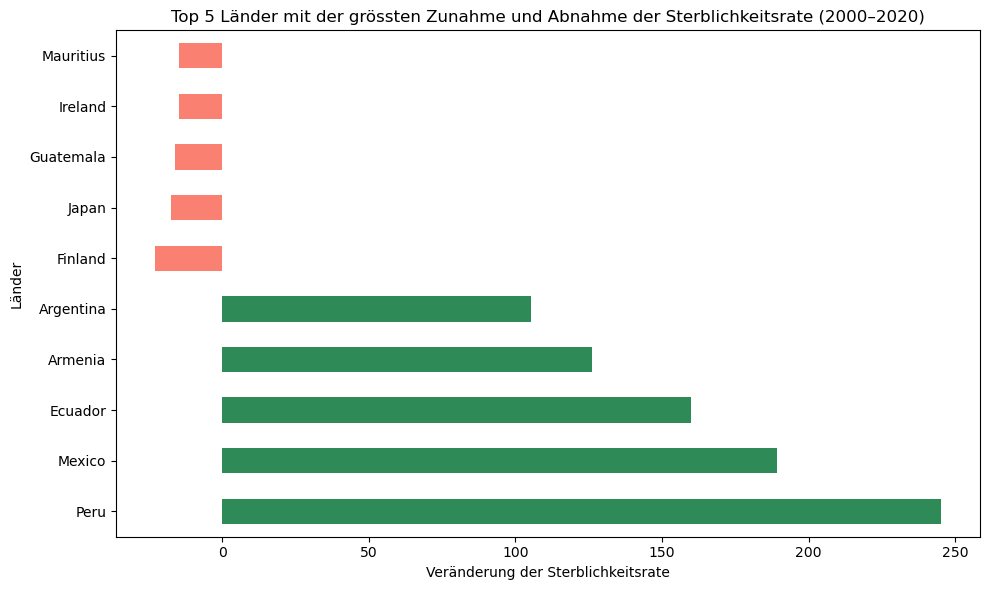

In [327]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten auf die Jahre 2000 und 2020 filtern
df_filtered = df_long.query("Jahr in [2000, 2020]")

# Pivot-Tabelle erstellen, um Start- und Endwerte für jedes Land zu berechnen
pivot_data = df_filtered.pivot(index="Länder", columns="Jahr", values="Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen")

# Fehlende Werte entfernen
pivot_data = pivot_data.dropna()

# Veränderung berechnen
pivot_data['change'] = pivot_data[2020] - pivot_data[2000]
pivot_data.rename(columns={2000: 'start_rate', 2020: 'end_rate'}, inplace=True)

# Top 5 Länder mit der größten Zunahme und Abnahme
top5_zunahme = pivot_data.nlargest(5, 'change')  # Größte Zunahme
top5_abnahme = pivot_data.nsmallest(5, 'change')  # Größte Abnahme

# Daten kombinieren
top5_combined = pd.concat([top5_zunahme, top5_abnahme])

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))  # Größe des Diagramms

# Farben festlegen: Grün für Zunahme, Rot für Abnahme
colors = ['seagreen' if x > 0 else 'salmon' for x in top5_combined['change']]

# Balkendiagramm plotten
top5_combined['change'].plot(kind='barh', color=colors)

# Diagramm beschriften
plt.title("Top 5 Länder mit der grössten Zunahme und Abnahme der Sterblichkeitsrate (2000–2020)")
plt.xlabel("Veränderung der Sterblichkeitsrate")
plt.ylabel("Länder")
plt.yticks(range(len(top5_combined)), top5_combined.index)

# Layout optimieren und anzeigen
plt.tight_layout()
plt.show()

### Visualisierung:

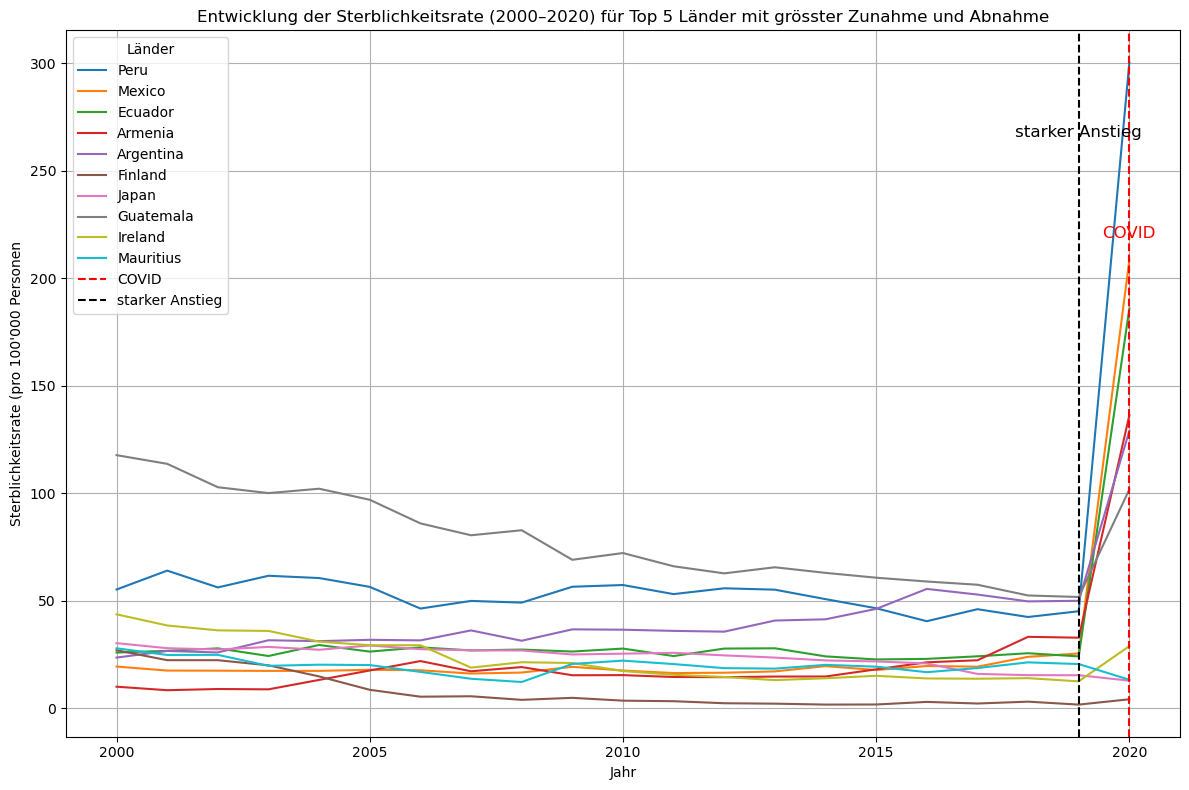

In [329]:
import pandas as pd
import matplotlib.pyplot as plt

# Länder auswählen: Top 5 Zunahme und Abnahme der Sterblichkeitsrate
top5_lander = pd.concat([top5_zunahme, top5_abnahme]).index  # Kombinierte Länder

# Daten für die ausgewählten Länder im Zeitraum 2000–2020 filtern
filtered_data = df_long.query("Jahr >= 2000 and Jahr <= 2020 and Länder in @top5_lander")

# Liniendiagramm erstellen
plt.figure(figsize=(12, 8))

# Für jedes Land die Entwicklung der Sterblichkeitsrate plotten
for land in top5_lander:
    land_data = filtered_data[filtered_data['Länder'] == land]
    plt.plot(
        land_data['Jahr'],
        land_data['Sterblichkeitsrate durch Atemwegsinfektionen pro 100000 Personen'],
        label=land
    )

# Eine gestrichelte Linie für das Jahr 2020 (COVID) hinzufügen
plt.axvline(x=2020, color='red', linestyle='--', label='COVID')

# Eine gestrichelte Linie für das Jahr 2019 (starker Anstieg) hinzufügen
plt.axvline(x=2019, color='black', linestyle='--', label='starker Anstieg')

# Diagramm beschriften
plt.title("Entwicklung der Sterblichkeitsrate (2000–2020) für Top 5 Länder mit grösster Zunahme und Abnahme")
plt.xlabel("Jahr")
plt.ylabel("Sterblichkeitsrate (pro 100'000 Personen")
plt.legend(title="Länder", loc='upper left')
plt.grid(True)

# Beschriftung für die COVID-Linie bei 2020 hinzufügen
plt.text(2020, plt.ylim()[1] * 0.70, 'COVID', color='red', ha='center', va='center', fontsize=12)

# Beschriftung für die Linie bei 2019 hinzufügen
plt.text(2019, plt.ylim()[1] * 0.85, 'starker Anstieg', color='black', ha='center', va='center', fontsize=12)

# Anpassung der x-Achse: Nur spezifische Jahre anzeigen
plt.xticks([2000, 2005, 2010, 2015, 2020])  # Zeigt nur die gewünschten Jahre auf der x-Achse

# Layout optimieren und anzeigen
plt.tight_layout()
plt.show()